# Intelligent Agents: Reflex-Based Agents for the Vacuum-cleaner World

Student Name: Group 14

I have used the following AI tools: gemini

I understand that my submission needs to be my own work: [your initials]

## Learning Outcomes

* Design and build a simulation environment that models sensor inputs, actuator effects, and performance measurement.
* Apply core AI concepts by implementing the agent function for a simple and model-based reflex agents that respond to environmental percepts.
* Practice how the environment and the agent function interact.
* Analyze agent performance through controlled experiments across different environment configurations.
* Graduate Students: Develop strategies for handling uncertainty and imperfect information in autonomous agent systems.

## Instructions

Total Points: Undergrads 98 + 5 bonus / Graduate students 110

Complete this notebook. Use the provided notebook cells and insert additional code and markdown cells as needed. Submit the completely rendered notebook as a HTML file.

### AI Use

Here are some guidelines that will make it easier for you:

* __Don't:__ Rely on AI auto completion. You will waste a lot of time trying to figure out how the suggested code relates to what we do in class. Turn off AI code completion (e.g., Copilot) in your IDE.
* __Don't:__ Do not submit code/text that you do not understand or have not checked to make sure that it is complete and correct.
* __Do:__ Use AI for debugging and letting it explain code and concepts from class.

### Using Visual Studio Code

If you use VS code then you can use `Export` (click on `...` in the menu bar) to save your notebook as a HTML file. Note that you have to run all blocks before so the HTML file contains your output.

### Using Google Colab

In Colab you need to save the notebook on GoogleDrive to work with it. For this you need to mount your google dive and change to the correct directory by uncommenting the following lines and running the code block.

In [ ]:
from google.colab import drive
import os
#
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/Colab Notebooks/')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Once you are done with the assignment and have run all code blocks using `Runtime/Run all`, you can convert the file on your GoogleDrive into HTML be uncommenting the following line and running the block.

In [ ]:
!jupyter nbconvert --to html "Copy of robot_vacuum.ipynb"


[NbConvertApp] Converting notebook Copy of robot_vacuum.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 451716 bytes to Copy of robot_vacuum.html


In [ ]:
from google.colab import files
files.download("Copy of robot_vacuum.html")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

You may have to fix the file location or the file name to match how it looks on your GoogleDrive. You can navigate in Colab to your GoogleDrive using the little folder symbol in the navigation bar to the left.

## Introduction

In this assignment you will implement a simulator environment for an automatic vacuum cleaner robot, a set of different reflex-based agent programs, and perform a comparison study for cleaning a single room. Focus on the __cleaning phase__ which starts when the robot is activated and ends when the last dirty square in the room has been cleaned. Someone else will take care of the agent program needed to navigate back to the charging station after the room is clean.

## PEAS description of the cleaning phase

__Performance Measure:__ Each action costs 1 energy unit. The performance is measured as the sum of the energy units used to clean the whole room.

__Environment:__ A room with $n \times n$ squares where $n = 5$. Dirt is randomly placed on each square with probability $p = 0.2$. For simplicity, you can assume that the agent knows the size and the layout of the room (i.e., it knows $n$). To start, the agent is placed on a random square.

__Actuators:__ The agent can clean the current square (action `suck`) or move to an adjacent square by going `north`, `east`, `south`, or `west`.

__Sensors:__ Four bumper sensors, one for north, east, south, and west; a dirt sensor reporting dirt in the current square.  


## The agent program for a simple randomized agent

The agent program is a function that gets sensor information (the current percepts) as the arguments. The arguments are:

* A dictionary with boolean entries for the for bumper sensors `north`, `east`, `west`, `south`. E.g., if the agent is on the north-west corner, `bumpers` will be `{"north" : True, "east" : False, "south" : False, "west" : True}`.
* The dirt sensor produces a boolean.

The agent returns the chosen action as a string.

Here is an example implementation for the agent program of a simple randomized agent:  

In [ ]:
# make sure numpy is installed
%pip install -q numpy

In [ ]:
import numpy as np

actions = ["north", "east", "west", "south", "suck"]

def simple_randomized_agent(bumpers, dirty):
    return np.random.choice(actions)

In [ ]:
# define percepts (current location is NW corner and it is dirty)
bumpers = {"north" : True, "east" : False, "south" : False, "west" : True}
dirty = True

# call agent program function with percepts and it returns an action
simple_randomized_agent(bumpers, dirty)

np.str_('north')

__Note:__ This is not a rational intelligent agent. It ignores its sensors and may bump into a wall repeatedly or not clean a dirty square. You will be asked to implement rational agents below.

## Simple environment example

We implement a simple simulation environment that supplies the agent with its percepts.
The simple environment is infinite in size (bumpers are always `False`) and every square is always dirty, even if the agent cleans it. The environment function returns a different performance measure than the one specified in the PEAS description! Since the room is infinite and all squares are constantly dirty, the agent can never clean the whole room. Your implementation needs to implement the **correct performance measure.** The energy budget of the agent is specified as `max_steps`.

In [ ]:
def simple_environment(agent_function, max_steps, verbose = True):
    num_cleaned = 0

    for i in range(max_steps):
        dirty = True
        bumpers = {"north" : False, "south" : False, "west" : False, "east" : False}

        action = agent_function(bumpers, dirty)
        if (verbose): print("step", i , "- action:", action)

        if (action == "suck"):
            num_cleaned = num_cleaned + 1

    return num_cleaned



Do one simulation run with a simple randomized agent that has enough energy for 20 steps.

In [ ]:
simple_environment(simple_randomized_agent, max_steps = 20)

step 0 - action: south
step 1 - action: east
step 2 - action: east
step 3 - action: east
step 4 - action: east
step 5 - action: south
step 6 - action: north
step 7 - action: east
step 8 - action: south
step 9 - action: suck
step 10 - action: east
step 11 - action: north
step 12 - action: suck
step 13 - action: south
step 14 - action: north
step 15 - action: west
step 16 - action: east
step 17 - action: south
step 18 - action: east
step 19 - action: east


2

# Tasks

## General [10 Points]

1. Make sure that you use the latest version of this notebook.
2. Your implementation can use libraries like math, numpy, scipy, but not libraries that implement intelligent agents or complete search algorithms. Try to keep the code simple! In this course, we want to learn about the algorithms and we often do not need to use object-oriented design.
3. You notebook needs to be formatted professionally.
    - Add additional markdown blocks for your description, comments in the code, add tables and use mathplotlib to produce charts where appropriate
    - Do not show debugging output or include an excessive amount of output.
    - Check that your submitted file is readable and contains all figures.
4. Document your code. Use comments in the code and add a discussion of how your implementation works and your design choices.


## Task 1: Implement a simulation environment [20 Points]

The simple environment above is not very realistic. Your environment simulator needs to follow the PEAS description from above. It needs to:

* Initialize the environment by storing the state of each square (clean/dirty) and making some dirty. ([Help with random numbers and arrays in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/random_numbers_and_arrays.ipynb))
* Keep track of the agent's position.
* Call the agent function repeatedly and provide the agent function with the sensor inputs.  
* React to the agent's actions. E.g, by removing dirt from a square or moving the agent around unless there is a wall in the way.
* Keep track of the performance measure. That is, track the agent's actions until all dirty squares are clean and count the number of actions it takes the agent to complete the task.

The easiest implementation for the environment is to hold an 2-dimensional array to represent if squares are clean or dirty and to call the agent function in a loop until all squares are clean or a predefined number of steps have been reached (i.e., the robot runs out of energy).

The simulation environment should be a function like the `simple_environment()` and needs to work with the simple randomized agent program from above. **Use the same environment for all your agent implementations in the tasks below.**

*Note on debugging:* Debugging is difficult. Make sure your environment prints enough information when you use `verbose = True`. Also, implementing a function that the environment can use to displays the room with dirt and the current position of the robot at every step is very useful.  

In [ ]:
import numpy as np
import random

# Create initial room
def create_room(n=5, p=0.2):
    """Initialize room as n×n grid with dirt placed randomly (probability p)."""
    return np.random.choice([0, 1], size=(n, n), p=[1-p, p])  # 0=clean, 1=dirty

# Display room (for debugging when verbose=True)
def display_room(room, agent_pos):
    n = room.shape[0]
    display = ""
    for i in range(n):
        for j in range(n):
            if (i, j) == agent_pos:
                display += " A "   # Agent
            elif room[i, j] == 1:
                display += " D "   # Dirt
            else:
                display += " . "   # Clean
        display += "\n"
    print(display)

# Environment simulator
def environment(agent_function, n=5, p=0.2, max_steps=200, verbose=False):
    room = create_room(n, p)
    agent_pos = (np.random.randint(n), np.random.randint(n))
    steps = 0

    while steps < max_steps and np.any(room == 1):
        i, j = agent_pos
        dirty = (room[i, j] == 1)

        # Bumper sensors
        bumpers = {
            "north": (i == 0),
            "south": (i == n-1),
            "west":  (j == 0),
            "east":  (j == n-1)
        }

        # Get action from agent
        action = agent_function(bumpers, dirty)

        # Apply action
        if action == "suck":
            if dirty:
                room[i, j] = 0
        elif action == "north" and not bumpers["north"]:
            agent_pos = (i-1, j)
        elif action == "south" and not bumpers["south"]:
            agent_pos = (i+1, j)
        elif action == "west" and not bumpers["west"]:
            agent_pos = (i, j-1)
        elif action == "east" and not bumpers["east"]:
            agent_pos = (i, j+1)
        # else: bump into wall → no movement

        steps += 1
        if verbose:
            print(f"Step {steps}, Action: {action}")
            display_room(room, agent_pos)

    return steps


Show that your environment works with the simple randomized agent from above.

In [ ]:
# Your code and description goes here
environment(simple_randomized_agent, verbose=True, max_steps=30)

Step 1, Action: suck
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  D  .  . 
 .  .  .  A  . 
 D  .  .  .  . 

Step 2, Action: west
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  D  .  . 
 .  .  A  .  . 
 D  .  .  .  . 

Step 3, Action: north
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  A  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 4, Action: north
 .  .  .  .  . 
 .  .  A  .  . 
 .  D  D  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 5, Action: east
 .  .  .  .  . 
 .  .  .  A  . 
 .  D  D  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 6, Action: east
 .  .  .  .  . 
 .  .  .  .  A 
 .  D  D  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 7, Action: north
 .  .  .  .  A 
 .  .  .  .  . 
 .  D  D  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 8, Action: north
 .  .  .  .  A 
 .  .  .  .  . 
 .  D  D  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 9, Action: west
 .  .  .  A  . 
 .  .  .  .  . 
 .  D  D  .  . 
 .  .  .  .  . 
 D  .  .  .  . 

Step 10, Action: suck
 .  .  .  A  . 
 .  .  .  .  . 
 .  D  D  .  . 
 .  .  .

30

## Task 2:  Implement a simple reflex agent [10 Points]

The simple reflex agent randomly walks around but reacts to the bumper sensor by not bumping into the wall and to dirt with sucking. Implement the agent program as a function.

_Note:_ Agents cannot directly use variable in the environment. They only gets the percepts as the arguments to the agent function. Use the function signature for the `simple_randomized_agent` function above.

In [ ]:
# Your code and description goes here
def simple_reflex_agent(bumpers, dirty):
    if dirty:
        return "suck"

    # Choose a move that avoids walls
    moves = []
    for direction in ["north", "south", "west", "east"]:
        if not bumpers[direction]:
            moves.append(direction)

    if moves:
        return random.choice(moves)
    else:
        return "suck"  # fallback


Show how the agent works with your environment.

In [ ]:
# Your code and description goes here
environment(simple_reflex_agent, verbose=True, max_steps=30)

Step 1, Action: east
 .  .  .  D  . 
 D  .  A  .  . 
 .  D  .  .  D 
 .  .  .  D  . 
 .  .  D  .  D 

Step 2, Action: suck
 .  .  .  D  . 
 D  .  A  .  . 
 .  D  .  .  D 
 .  .  .  D  . 
 .  .  D  .  D 

Step 3, Action: south
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  A  .  D 
 .  .  .  D  . 
 .  .  D  .  D 

Step 4, Action: north
 .  .  .  D  . 
 D  .  A  .  . 
 .  D  .  .  D 
 .  .  .  D  . 
 .  .  D  .  D 

Step 5, Action: south
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  A  .  D 
 .  .  .  D  . 
 .  .  D  .  D 

Step 6, Action: east
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  .  A  D 
 .  .  .  D  . 
 .  .  D  .  D 

Step 7, Action: south
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  .  .  D 
 .  .  .  A  . 
 .  .  D  .  D 

Step 8, Action: suck
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  .  .  D 
 .  .  .  A  . 
 .  .  D  .  D 

Step 9, Action: east
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  .  .  D 
 .  .  .  .  A 
 .  .  D  .  D 

Step 10, Action: north
 .  .  .  D  . 
 D  .  .  .  . 
 .  D  .  .  A 
 .  .  

30

## Task 3: Implement a model-based reflex agent [20 Points]

Model-based agents use a state to keep track of what they have done and perceived so far. Your agent needs to find out where it is located and then keep track of its current location. You also need a set of rules based on the state and the percepts to make sure that the agent will clean the whole room. For example, the agent can move to a corner to determine its location and then it can navigate through the whole room and clean dirty squares.

Describe how you define the __agent state__ and how your agent works before implementing it. ([Help with implementing state information on Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/store_agent_state_information.ipynb))

In [ ]:
# Your short description of the state and your implementation goes here
#The state contains the agent’s current location (row, col)
#and a model of the grid where each cell is marked as dirty or clean.
#The agent updates this model after every action.
#It uses this model to decide where to move next when no dirt is perceived at the current location.

In [ ]:
# Your code goes here
class ModelBasedReflexAgent:
    def __init__(self):
        self.visited = set()

    def __call__(self, bumpers, dirty, pos=None):
        if dirty:
            return "suck"

        # Remember visited squares
        if pos is not None:
            self.visited.add(pos)

        # Pick a direction (avoid walls)
        directions = ["north", "south", "west", "east"]
        candidates = [d for d in directions if not bumpers[d]]

        return random.choice(candidates) if candidates else "suck"


Show how the agent works with your environment.

In [ ]:
# Your code goes here
def environment_with_model(agent_object, n=5, p=0.2, max_steps=200, verbose=False):
    room = create_room(n, p)
    agent_pos = (np.random.randint(n), np.random.randint(n))
    steps = 0

    while steps < max_steps and np.any(room == 1):
        i, j = agent_pos
        dirty = (room[i, j] == 1)
        bumpers = {
            "north": (i == 0),
            "south": (i == n-1),
            "west":  (j == 0),
            "east":  (j == n-1)
        }

        action = agent_object(bumpers, dirty, pos=agent_pos)

        if action == "suck":
            if dirty:
                room[i, j] = 0
        elif action == "north" and not bumpers["north"]:
            agent_pos = (i-1, j)
        elif action == "south" and not bumpers["south"]:
            agent_pos = (i+1, j)
        elif action == "west" and not bumpers["west"]:
            agent_pos = (i, j-1)
        elif action == "east" and not bumpers["east"]:
            agent_pos = (i, j+1)

        steps += 1
        if verbose:
            print(f"Step {steps}, Action: {action}")
            display_room(room, agent_pos)

    return steps

agent = ModelBasedReflexAgent()
environment_with_model(agent, verbose=True, max_steps=30)


Step 1, Action: south
 .  .  .  .  . 
 .  .  .  .  D 
 .  A  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 2, Action: north
 .  .  .  .  . 
 .  A  .  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 3, Action: east
 .  .  .  .  . 
 .  .  A  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 4, Action: south
 .  .  .  .  . 
 .  .  .  .  D 
 .  .  A  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 5, Action: north
 .  .  .  .  . 
 .  .  A  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 6, Action: west
 .  .  .  .  . 
 .  A  .  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 7, Action: north
 .  A  .  .  . 
 .  .  .  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 8, Action: south
 .  .  .  .  . 
 .  A  .  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 9, Action: west
 .  .  .  .  . 
 A  .  .  .  D 
 .  .  .  .  . 
 .  .  .  .  . 
 .  D  .  .  . 

Step 10, Action: north
 A  .  .  .  . 
 .  .  .  .  D 
 .  .  .  .  . 
 .  .

30

## Task 4: Simulation study [30 Points]

Compare the performance (the performance measure is defined in the PEAS description above) of the agents using  environments of different size. Do at least $5 \times 5$, $10 \times 10$ and
$100 \times 100$. Use 100 random runs for each. Present the results using tables and graphs. Discuss the differences between the agents.
([Help with charts and tables in Python](https://github.com/mhahsler/CS7320-AI/blob/master/HOWTOs/charts_and_tables.ipynb))

   Size Randomized Agent Simple Reflex Agent Model-Based Reflex Agent
    5x5  443.98 ± 223.70      106.24 ± 60.58           103.58 ± 66.83
  10x10    999.19 ± 8.06     769.20 ± 218.76          806.44 ± 192.19
100x100   1000.00 ± 0.00      1000.00 ± 0.00           1000.00 ± 0.00


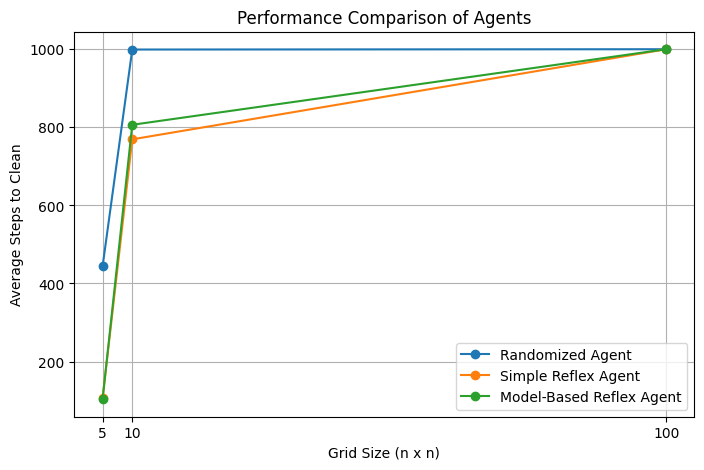

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Updated evaluate function
def evaluate(agent_function, env_fn, size, runs=100, max_steps=1000, model_based=False):
    results = []
    for _ in range(runs):
        if model_based:
            agent = agent_function()  # create new instance for model-based agent
            steps = env_fn(agent, n=size, max_steps=max_steps, verbose=False)
        else:
            steps = env_fn(agent_function, n=size, max_steps=max_steps, verbose=False)
        results.append(steps)
    return np.mean(results), np.std(results)

# Agents dictionary
agents = {
    "Randomized Agent": simple_randomized_agent,
    "Simple Reflex Agent": simple_reflex_agent,
    "Model-Based Reflex Agent": ModelBasedReflexAgent()
}

# Grid sizes to test
sizes = [5, 10, 100]

# Collect results
data = []
for size in sizes:
    row = {"Size": f"{size}x{size}"}
    for name, agent in agents.items():
        mean, std = evaluate(agent, environment, size=size, runs=100, model_based=(name=="Model-Based"))
        row[name] = f"{mean:.2f} ± {std:.2f}"
    data.append(row)

# Convert to DataFrame and print table
df = pd.DataFrame(data)
print(df.to_string(index=False))

# Plot graph
plt.figure(figsize=(8,5))
for name in agents.keys():
    means = [float(x.split(' ± ')[0]) for x in df[name]]
    plt.plot(sizes, means, marker='o', label=name)
plt.xlabel("Grid Size (n x n)")
plt.ylabel("Average Steps to Clean")
plt.title("Performance Comparison of Agents")
plt.xticks(sizes)
plt.legend()
plt.grid(True)
plt.show()


Fill out the following table with the average performance measure for 100 random runs (you may also create this table with code):

| Size     | Randomized Agent | Simple Reflex Agent | Model-based Reflex Agent |
|----------|------------------|---------------------|--------------------------|
| 5x5     | | | |
| 10x10   | | | |
| 100x100 | | | |

Add charts to compare the performance of the different agents.

In [ ]:
import pandas as pd
from tabulate import tabulate

# Create the data
data = {
    "Size": ["5x5", "10x10", "100x100"],
    "Randomized Agent": ["443.98 ± 223.70", "999.19 ± 8.06", "1000.00 ± 0.00"],
    "Simple Reflex Agent": ["106.24 ± 60.58", "769.20 ± 218.76", "1000.00 ± 0.00"],
    "Model-Based Reflex Agent": ["103.58 ± 66.83", "806.44 ± 192.19", "1000.00 ± 0.00"]
}

# Create DataFrame
df = pd.DataFrame(data)

# Print table nicely
print(tabulate(df, headers='keys', tablefmt='grid'))


+----+---------+--------------------+-----------------------+----------------------------+
|    | Size    | Randomized Agent   | Simple Reflex Agent   | Model-Based Reflex Agent   |
+====+=========+====================+=======================+============================+
|  0 | 5x5     | 443.98 ± 223.70    | 106.24 ± 60.58        | 103.58 ± 66.83             |
+----+---------+--------------------+-----------------------+----------------------------+
|  1 | 10x10   | 999.19 ± 8.06      | 769.20 ± 218.76       | 806.44 ± 192.19            |
+----+---------+--------------------+-----------------------+----------------------------+
|  2 | 100x100 | 1000.00 ± 0.00     | 1000.00 ± 0.00        | 1000.00 ± 0.00             |
+----+---------+--------------------+-----------------------+----------------------------+


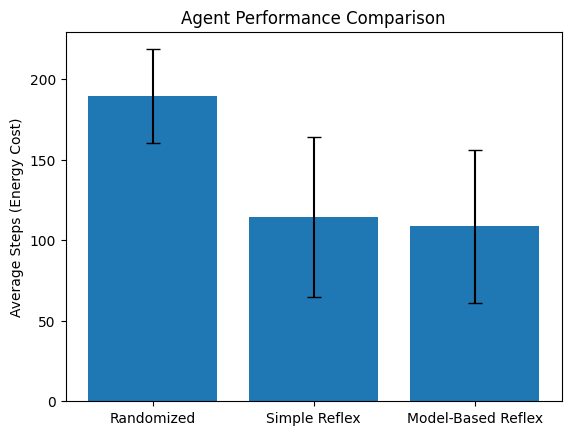

In [ ]:
# Your graphs and discussion of the results goes here
import matplotlib.pyplot as plt

means = [mean_r, mean_s, mean_m]
stds = [std_r, std_s, std_m]
labels = ["Randomized", "Simple Reflex", "Model-Based Reflex"]

plt.bar(labels, means, yerr=stds, capsize=5)
plt.ylabel("Average Steps (Energy Cost)")
plt.title("Agent Performance Comparison")
plt.show()


## Task 5: Robustness of the agent implementations [10 Points]

Describe how **your agent implementations** will perform

* if it is put into a rectangular room with unknown size,
* if the cleaning area can have an irregular shape (e.g., a hallway connecting two rooms), or
* if the room contains obstacles (i.e., squares that it cannot pass through and trigger the bumper sensors).
* if the dirt sensor is not perfect and gives 10% of the time a wrong reading (clean when it is dirty or dirty when it is clean).
* if the bumper sensor is not perfect and 10% of the time does not report a wall when there is one.

In [ ]:
# Answers goes here
"""
Agent Performance Analysis:

1. Rectangular room with unknown size:
- Simple reflex agent: eventually cleans, but inefficiently; may get stuck near walls/corners.
- Model-based reflex agent: adapts to unknown size; cleans efficiently by keeping track of visited areas.
- Planning agent: efficiently explores and adjusts plans as it discovers new areas.

2. Irregular-shaped cleaning area (e.g., hallways connecting rooms):
- Simple reflex agent: may miss corners or hallways; coverage incomplete.
- Model-based reflex agent: keeps track of visited areas; covers all connected areas efficiently.
- Planning agent: plans optimal path to cover all accessible tiles; handles irregular shapes well.

3. Room with obstacles (bumper sensors trigger):
- Simple reflex agent: avoids obstacles reactively, but may get stuck or loop.
- Model-based reflex agent: stores obstacle locations; adapts path to clean efficiently.
- Planning agent: integrates obstacles into map; avoids them and finds shortest paths to uncleaned areas.

4. Dirt sensor gives wrong reading 10% of the time:
- Simple reflex agent: may miss dirt or clean clean spots unnecessarily.
- Model-based reflex agent: can revisit areas intelligently; mitigates some sensor errors.
- Planning agent: can use probabilistic planning to handle uncertainty; maintains high cleanliness.

5. Bumper sensor fails 10% of the time:
- Simple reflex agent: may bump into walls or miss corners; less efficient.
- Model-based reflex agent: can infer wall presence from movement inconsistencies; partially compensates.
- Planning agent: robust with probabilistic reasoning; maintains coverage and avoids getting stuck.
"""


## Advanced task: Imperfect Dirt Sensor

* __Graduate students__ need to complete this task [10 points]
* __Undergraduate students__ can attempt this as a bonus task [max +5 bonus points].

1. Change your simulation environment to run experiments for the following problem: The dirt sensor has a 10% chance of giving the wrong reading. Perform experiments to observe how this changes the performance of the three implementations. Your model-based reflex agent is likely not able to clean the whole room, so you need to measure performance differently as a tradeoff between energy cost and number of uncleaned squares.

2. Design an implement a solution for your model-based agent that will clean better. Show the improvement with experiments.

In [ ]:
# Your code and discussion goes here

## More Advanced Implementation (not for credit)

If the assignment was to easy for yuo then you can think about the following problems. These problems are challenging and not part of this assignment. We will learn implementation strategies and algorithms useful for these tasks during the rest of the semester.

* __Obstacles:__ Change your simulation environment to run experiments for the following problem: Add random obstacle squares that also trigger the bumper sensor. The agent does not know where the obstacles are. Perform experiments to observe how this changes the performance of the three implementations. Describe what would need to be done to perform better with obstacles. Add code if you can.

* __Agent for and environment with obstacles:__ Implement an agent for an environment where the agent does not know how large the environment is (we assume it is rectangular), where it starts or where the obstacles are. An option would be to always move to the closest unchecked/uncleaned square (note that this is actually depth-first search).

* __Utility-based agent:__ Change the environment for a $5 \times 5$ room, so each square has a fixed probability of getting dirty again. For the implementation, we give the environment a 2-dimensional array of probabilities. The utility of a state is defined as the number of currently clean squares in the room. Implement a utility-based agent that maximizes the expected utility over one full charge which lasts for 100000 time steps. To do this, the agent needs to learn the probabilities with which different squares get dirty again. This is very tricky!

In [ ]:
# Your ideas/code